<p align="center">
  <img src="escudo/escudo_uaustralchile.png" alt="Universidad — Escudo" width="100">
</p>

# Laboratorio ACUS220: Análisis acústico de la voz - Espectrogramas, formantes y espacios latentes (Python)

**Objetivo general**  
Explorar la producción y representación acústica de la voz humana mediante grabación, análisis espectral y reducción de dimensionalidad.

**En este cuadernillo vas a:**

1. **Grabar tu voz** desde el micrófono, guardar en formato **WAV** y reproducirla.  
2. **Visualizar la onda y el espectrograma (STFT)** para entender cómo la energía se distribuye en el tiempo y la frecuencia.  
3. (Opcional) **Observar un espectrograma en “tiempo casi real”**, interactuando con tu voz o silbido.  
4. **Grabar las cinco vocales** y estimar sus **formantes (F1, F2, F3)** usando análisis **LPC (Linear Predictive Coding)**.  
5. **Representar las vocales en espacios acústicos** usando métodos de reducción de dimensionalidad:  
   - **PCA** (análisis de componentes principales)  
   - **t-SNE** (embedding estocástico)  
   - **UMAP** (aproximación y proyección uniforme de variedades)  
6. **Visualizar agrupamientos acústicos** entre vocales y discutir su relación con la articulación fisiológica.

> **Requisitos:** Ejecutar localmente (Jupyter/Lab con acceso al micrófono).  
> Si estás en la nube (Colab, etc.), la grabación con micrófono puede no funcionar correctamente.


## Introducción teórica: del sonido a los espacios de representación latente

La voz humana puede entenderse como el resultado de un sistema de **fuente y filtro**:
- La **fuente** (cuerdas vocales) genera una señal periódica rica en armónicos.
- El **filtro** (tracto vocal) modela esa señal mediante resonancias llamadas **formantes**.

La **Transformada de Fourier de Tiempo Corto (STFT)** permite observar cómo la energía de las distintas frecuencias evoluciona con el tiempo, dando origen al **espectrograma**, herramienta fundamental para el análisis del habla.

Entre las frecuencias más relevantes, los **tres primeros formantes (F1, F2, F3)** describen gran parte de la estructura acústica de las vocales:
- **F1** se relaciona con la **altura de la lengua** (vocales abiertas ↔ cerradas).  
- **F2** con el **punto de articulación** (anterior ↔ posterior).  
- **F3** con características de **timbre y redondeamiento**.  

El clásico mapa **F1-F2** muestra el espacio vocálico en coordenadas acústicas, reflejando la fisiología articulatoria del hablante.

### Reducción de dimensionalidad de formantes

Para visualizar y comparar las vocales en espacios más abstractos, se aplican técnicas de **reducción de dimensionalidad** sobre [F1, F2, F3]:

| Método | Tipo | Propósito |
|---------|------|-----------|
| **PCA (Principal Component Analysis)** | Lineal | Busca los ejes que explican la mayor varianza acústica global. |
| **t-SNE (t-distributed Stochastic Neighbor Embedding)** | No lineal (local) | Resalta agrupaciones naturales preservando vecindad local. |
| **UMAP (Uniform Manifold Approximation and Projection)** | No lineal (global) | Preserva tanto la forma global como la estructura local del espacio. |

Estas técnicas permiten observar **agrupamientos perceptuales** entre vocales, revelando relaciones acústicas que reflejan su producción fisiológica y su percepción auditiva.

## Alta dimensionalidad y reducción: ver lo invisible en los datos

En ciencia de datos, cada observación (una imagen, un sonido, una persona, una medición ambiental, etc.)  
puede describirse mediante **muchas variables o características**.  
Por ejemplo:
- En visión por computador: brillo, color, textura, bordes, profundidad.  
- En biología: expresión de miles de genes por célula.  
- En acústica: formantes, energía, espectro, duración, entre otros.

Cada variable es como un **eje en un espacio multidimensional**.  
Cuando tenemos decenas o cientos de variables, los datos “viven” en un espacio de muy **alta dimensionalidad**,  
lo que hace imposible **visualizarlos directamente** o **intuir patrones**.

Esto plantea dos desafíos clásicos:
1. **Dificultad de interpretación** — no podemos imaginar más allá de 3 dimensiones.  
2. **Redundancia y ruido** — algunas variables aportan información similar o poco relevante.

Para abordar estos desafíos, usamos **técnicas de reducción de dimensionalidad**,  
que buscan proyectar los datos a un espacio de menor dimensión,  
**preservando la estructura más importante** (variación, relaciones o agrupamientos).

Algunos métodos comunes son:

- **PCA (Principal Component Analysis)**  
  Reducción lineal que encuentra los ejes que capturan la mayor varianza del conjunto.  
  Es ideal para explorar la estructura global y detectar correlaciones.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  
  Técnica no lineal que prioriza mantener las **relaciones locales**:  
  puntos cercanos en el espacio original permanecen cercanos en la proyección.

- **UMAP (Uniform Manifold Approximation and Projection)**  
  Equilibrio entre relaciones locales y globales; más rápido y robusto que t-SNE.

Estas herramientas permiten **“ver” estructuras o patrones ocultos**:  
clústeres, transiciones, anomalías que no son evidentes en tablas o matrices.

### Ilustración conceptual

A continuación se muestra un ejemplo esquemático del proceso de reducción de dimensionalidad:  
primero los datos están distribuidos en un espacio de **alta dimensión (3D)**  
y luego son **proyectados a 2D** para poder observar sus patrones y agrupamientos.

<p align="center">
  <img src="figs/concept_dim_high_dim.png" width="430">
  <img src="figs/concept_dim_low_dim.png" width="430">
</p>

En el contexto de este laboratorio, aplicaremos estas técnicas  
a los **formantes de la voz humana (F1, F2, F3)** para visualizar  
cómo las distintas vocales se organizan naturalmente en un espacio acústico reducido.

## Espacio latente: la estructura invisible detrás de los datos

<p align="center">
  <img src="figs/latent.jpg" width="430">
  <img src="figs/vae.png" width="630">  
  <br>
  <em>Figura 1. Metáfora visual del espacio latente: el fuego ilumina un objeto, y vemos su proyección en la pared.</em>
</p>

Cuando analizamos datos complejos (voz, imágenes, texto, biología, ciudades, etc.),  
cada observación puede tener **cientos o miles de variables**.  
Sin embargo, la mayor parte de esa información suele estar **correlacionada** o **redundante**.  
En el fondo, los datos se organizan en torno a **patrones más simples y ocultos**.

A ese espacio donde los datos “viven” de manera más compacta y significativa  
lo llamamos **espacio latente** (*latent space*).

El término proviene de “latente” como algo **oculto pero esencial**:  
no se observa directamente, pero contiene la **estructura interna** que da forma a los datos.

## 0) Instalación rápida de paquetes

In [ ]:
# Si es la primera vez, descomenta e instala:
# %pip install sounddevice soundfile librosa matplotlib numpy scipy ipywidgets
# %pip install --upgrade ipympl  # para backend interactivo (opcional)

import numpy as np, matplotlib.pyplot as plt, soundfile as sf, sounddevice as sd
from IPython.display import Audio, display
import scipy.signal as sig
import librosa, librosa.display
import ipywidgets as W
print("Perfecto... Ya tienes en tu ambiente virtual: numpy/matplotlib/soundfile/sounddevice/scipy/librosa cargados.")


## 1) Grabar audio desde el micrófono y guardar WAV

In [ ]:
# Parámetros mínimos para tener tu propia grabación

# Sampling rate (también la puedes conocer como frecuencia de muestreo).
sr = 16000       # 16000 Hz es suficiente para una señal de voz... ¿Recuerdas el teorema de Nyquist-Shannon?: 
                 # dice que debes muestear tu señal de audio por lo menos a una sampling rate (sr) 
                 # mayor que el doble de la frecuencia máxima contenida en tu señal. 
                 # En el caso de la voz, una características muy fuerte que nos distingue a los seres humanos, puede llegar a tener 
                 # frecuencias máximas cerca de 8000 Hz)
dur = 3.0        # segundos
out_wav = "nombra_tu_grabacion.wav"

print(f"Grabando {dur} s a {sr} Hz... habla fuerte o silba fuerte cerca del micrófono.")
sd.default.samplerate = sr
sd.default.channels = 1
x = sd.rec(int(dur*sr), dtype='float32')
sd.wait()
sf.write(out_wav, x, sr)
print(f"Guardado con el nombre: {out_wav}")

# Escúchalo:
display(Audio(out_wav))


## 2) Onda temporal y espectrograma (STFT)


**¿Qué es el espectrograma?**  
Es la **energía** por **frecuencia** a lo largo del **tiempo**. Se calcula con el método matematico conocido como **Transformada de Fourier de Tiempo Corto (STFT)**. La STFT toma ventanas de corta duración, las que se suelen denominar "frames" (por ejemplo, un frame de 25 ms). A cada frame se le aplica una función de ventana (por ejemplo, muy popular es la función Hann) y se calcula una FFT (**Fast Fourier Transform**) para ese frame. Es muy habitual usar **traslape** (a veces se le llama **hop**) entre un frame actaul y el inmediatamente siguiente.


In [ ]:
# Carga tu grabación (o cualquier WAV propio que tengas)
x, sr = sf.read("nombra_tu_grabacion.wav", always_2d=False)
if x.ndim > 1:
    x = x.mean(axis=1)  # mono

# Espectrograma STFT (magnitud en dB)
n_fft = 1024
hop = 256
S = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop, window="hann"))**2
S_db = librosa.power_to_db(S, ref=np.max)
t = librosa.frames_to_time(np.arange(S.shape[1]), sr=sr, hop_length=hop)
f = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

plt.figure(figsize=(12,3))
plt.plot(np.arange(len(x))/sr, x)
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.title("Forma de onda temporal")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop, x_axis='time', y_axis='hz', cmap="magma")
plt.colorbar(label="Magnitud [dB]"); plt.title("Espectrograma (STFT)")
plt.tight_layout()
plt.show()


## 3) Graba las vocales (a, e, i, o, u) y analiza formantes

Usarás un script sencillo y autocontenido que:
	
1) Graba N segundos desde el micrófono (o lee un WAV si se lo pasas);
2) Guarda el audio en WAV;
3) Muestra espectrograma, PSD (Welch) y envolvente LPC;
4) Detecta y etiqueta formantes F1–F3 (peaks de la envolvente espectral bajo 4 kHz);
5) Exporta PNG + CSV con las frecuencias estimadas.

In [ ]:
!python formants_vowels_demo.py --record --seconds 3 --sr 16000 --out mi_vocal_a

In [ ]:
!python formants_vowels_demo.py --record --seconds 3 --sr 16000 --out mi_vocal_e

In [ ]:
!python formants_vowels_demo.py --record --seconds 3 --sr 16000 --out mi_vocal_i

In [ ]:
!python formants_vowels_demo.py --record --seconds 3 --sr 16000 --out mi_vocal_o

In [ ]:
!python formants_vowels_demo.py --record --seconds 3 --sr 16000 --out mi_vocal_u

## 4) Graba nuevamente las vocales (a, e, i, o, u) y analiza formantes

In [ ]:
def record_wav(seconds=1.5, sr=16000, filename="tmp.wav"):
    print(f"Grabando {seconds}s...")
    sd.default.samplerate = sr; sd.default.channels = 1
    x = sd.rec(int(seconds*sr), dtype='float32'); sd.wait()
    sf.write(filename, x, sr); print("OK:", filename); return filename

vowels = ["a","e","i","o","u"]
files = {}
for v in vowels:
    input(f"Presiona ENTER y pronuncia una '{v}' sostenida...")
    files[v] = record_wav(seconds=1.5, sr=16000, filename=f"vocal_{v}.wav")

files


### Estimación simple de formantes con Codificación Predictiva Lineal (LPC)

In [ ]:
import numpy.linalg as la

def lpc_formants(x, sr, order=14):
    # Pre-énfasis leve
    x = sig.lfilter([1, -0.97], [1], x)
    # Ventana y recorte (centro de la vocal)
    N = len(x)
    start = int(0.25*N); end = int(0.75*N)
    xw = x[start:end] * np.hanning(end-start)
    # LPC
    a = librosa.lpc(xw, order=order)  # coeficientes a[0..order]
    # Raíces del polinomio A(z); formantes: raíces complejas dentro del círculo unitario
    rts = np.roots(a)
    rts = rts[np.imag(rts) >= 0.01]  # parte superior
    angs = np.angle(rts)
    freqs = angs * (sr/(2*np.pi))
    # Quitar frecuencias bajas irreales y ordenar
    freqs = np.sort(freqs[(freqs>90) & (freqs<5000)])
    # Los primeros dos suelen aproximar F1, F2
    return freqs

def analyze_vowel(wav):
    x, sr = sf.read(wav, always_2d=False)
    if x.ndim>1: x = x.mean(axis=1)
    freqs = lpc_formants(x, sr, order=14)
    # graficar espectro + marcadores
    n_fft=2048; hop=256
    S = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop))**2
    S_db = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10,3.5))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop, x_axis='time', y_axis='hz', cmap="magma")
    for f in freqs[:2]:
        plt.axhline(f, color='c', linestyle='--', linewidth=2)
        plt.text(0.02, f+30, f"~{int(f)} Hz", color='c')
    plt.title(f"Espectrograma + formantes estimados: {wav}")
    plt.tight_layout(); plt.show()
    return freqs

# Ejecuta sobre tus 5 vocales
formants = {}
for v, f in files.items():
    freqs = analyze_vowel(f)
    formants[v] = freqs[:2] if len(freqs)>=2 else freqs

formants


In [ ]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa, librosa.display, scipy.signal as sig
import pandas as pd

def lpc_formants(x, sr, order=14):
    """Calcula formantes (F1–F3) usando LPC."""
    x = sig.lfilter([1, -0.97], [1], x)
    N = len(x)
    xw = x[int(0.25*N):int(0.75*N)] * np.hanning(int(0.5*N))
    a = librosa.lpc(xw, order=order)
    rts = np.roots(a)
    rts = rts[np.imag(rts) >= 0.01]
    angs = np.angle(rts)
    freqs = np.sort(angs * (sr / (2*np.pi)))
    freqs = freqs[(freqs > 90) & (freqs < 5000)]
    return freqs

def analyze_vowel(wav_path, show_plot=True):
    """Analiza vocal, retorna formantes y genera figura opcional."""
    x, sr = sf.read(wav_path, always_2d=False)
    if x.ndim > 1:
        x = x.mean(axis=1)
    freqs = lpc_formants(x, sr, order=14)

    if show_plot:
        S = np.abs(librosa.stft(x, n_fft=2048, hop_length=256))**2
        S_db = librosa.power_to_db(S, ref=np.max)
        plt.figure(figsize=(9, 4))
        librosa.display.specshow(S_db, sr=sr, hop_length=256,
                                 x_axis='time', y_axis='hz', cmap="magma")
        for f in freqs[:3]:
            plt.axhline(f, color='c', ls='--', lw=2)
            plt.text(0.02, f + 50, f"{int(f)} Hz", color='c')
        plt.title(f"Espectrograma + formantes estimados\n{wav_path}")
        plt.tight_layout()
        plt.show()
    return freqs

# === Analiza y exporta CSV ===
files = {
    "a": "mi_vocal_a.wav",
    "e": "mi_vocal_e.wav",
    "i": "mi_vocal_i.wav",
    "o": "mi_vocal_o.wav",
    "u": "mi_vocal_u.wav"
}

formants_data = []
for vowel, wav in files.items():
    freqs = analyze_vowel(wav)
    F1 = freqs[0] if len(freqs) > 0 else np.nan
    F2 = freqs[1] if len(freqs) > 1 else np.nan
    F3 = freqs[2] if len(freqs) > 2 else np.nan
    formants_data.append({"vocal": vowel, "F1_Hz": F1, "F2_Hz": F2, "F3_Hz": F3})

df_formants = pd.DataFrame(formants_data)
df_formants.to_csv("formants_vowels_results.csv", index=False)
print("Resultados guardados en 'formants_vowels_results.csv'")
display(df_formants)

### Dispersión F1 vs F2 (vocales)

In [ ]:
F1 = []; F2 = []; lbl = []
for v, fs in formants.items():
    if len(fs)>=2:
        F1.append(fs[0]); F2.append(fs[1]); lbl.append(v)

plt.figure(figsize=(5,4))
plt.scatter(F1, F2)
for i, v in enumerate(lbl):
    plt.text(F1[i]+10, F2[i]+10, v.upper())
plt.xlabel("F1 [Hz]"); plt.ylabel("F2 [Hz]"); plt.title("Mapa aproximado de formantes")
plt.grid(True, ls='--', alpha=0.4); plt.tight_layout(); plt.show()



## 5) Notas didácticas rápidas

- **STFT**: divide la señal en ventanas solapadas; a cada una se le aplica FFT → columnas del espectrograma.
- **Resolución tiempo-frecuencia**: ventanas más largas → mejor resolución en **frecuencia** y peor en **tiempo** (y viceversa).
- **Silbido**: es casi un tono puro ⇒ en el espectrograma verás una **línea horizontal** (una sola frecuencia dominante).
- **Vocales**: se diferencian por sus **formantes** (peaks del tracto vocal). F1 y F2 suelen estar en ~[300–900] Hz y [800–2500] Hz según la vocal y la persona.
- **Limitaciones**: la estimación de formantes con **LPC** aquí es básica (orden fijo, sin tracking). Sirve para demostración; para investigación usar análisis más robusto (praat/estimator especializado).


In [ ]:
#pip install datasets librosa soundfile umap-learn scikit-learn

In [ ]:
#!pip install -q sounddevice soundfile librosa matplotlib numpy pandas scikit-learn umap-learn

In [ ]:
import os, sounddevice as sd, soundfile as sf, numpy as np

OUTDIR = "data/mis_vocales"; os.makedirs(OUTDIR, exist_ok=True)
SR, DUR, TAKES = 16000, 2.5, 5

def grabar(seg=DUR, sr=SR):
    print(f"Grabando {seg} s…")
    x = sd.rec(int(seg*sr), samplerate=sr, channels=1, dtype='float32')
    sd.wait()
    return x[:,0]

for v in "aeiou":
    print(f"\n=== Vocal '{v}' ===")
    for k in range(TAKES):
        input(f"Presiona Enter y pronuncia '{v}' {DUR}s…")
        x = grabar(DUR, SR)
        sf.write(f"{OUTDIR}/{v}_{k:03d}.wav", x, SR)
        print(f"{OUTDIR}/{v}_{k:03d}.wav")

print("\n Listo. Archivos en:", OUTDIR)

Guardado CSV: data/formants_local.csv (n=25)


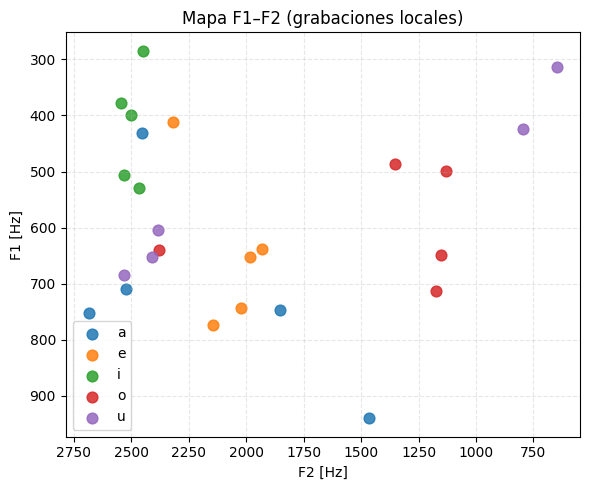

/Users/vpoblete/miniconda3/envs/acus220/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


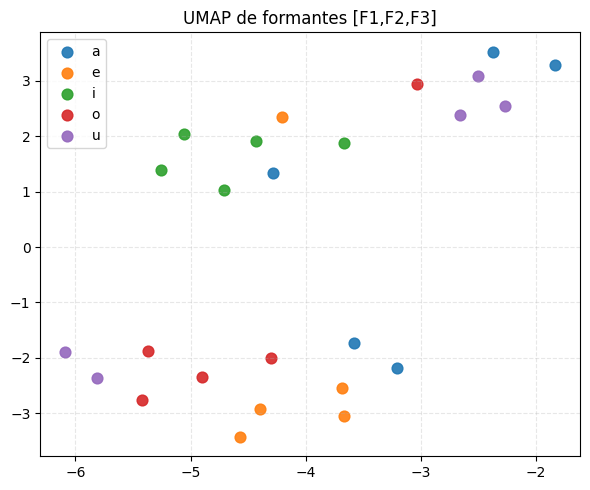

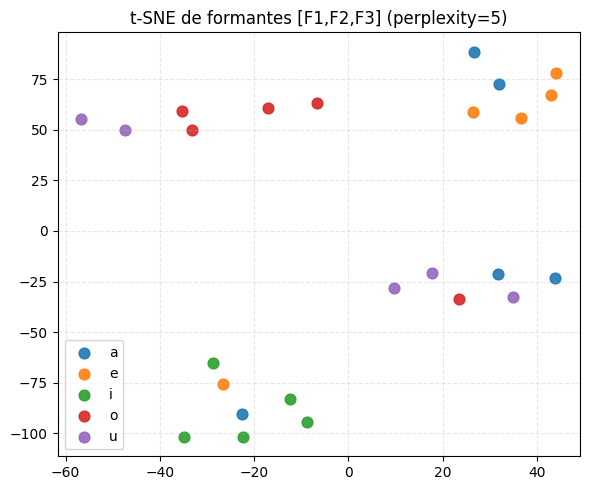

Figuras en: data/figs


In [5]:
import os, glob, math, warnings
import numpy as np, pandas as pd, soundfile as sf, librosa, scipy.signal as sig
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

AUDIO_DIR = "data/mis_vocales"
CSV_OUT   = "data/formants_local.csv"
FIGS_DIR  = Path("data/figs"); FIGS_DIR.mkdir(parents=True, exist_ok=True)

def load_mono(path, target_sr=16000):
    x, sr = sf.read(path, always_2d=False)
    if x.ndim>1: x = x.mean(axis=1)
    if sr != target_sr: x = librosa.resample(x.astype(float), orig_sr=sr, target_sr=target_sr); sr=target_sr
    x = x.astype(float); m = np.max(np.abs(x))+1e-12; x /= m
    return x, sr

def preemph(x, k=0.97): return sig.lfilter([1.,-k],[1.],x)

def pick_stable_chunk(x, sr, want_ms=80, frame_ms=25, hop_ms=10):
    N=len(x); 
    if N < sr*(want_ms/1000): return x
    L=int(sr*frame_ms/1000); H=int(sr*hop_ms/1000)
    L=max(L,8); H=max(H,1)
    pad=(((math.ceil((N-L)/H)+1)*H + L) - N); xpad=np.pad(x,(0,max(0,pad)))
    frames=librosa.util.frame(xpad, frame_length=L, hop_length=H); energy=(frames**2).sum(axis=0)
    k=int(np.argmax(energy)); center = k*H + L//2
    half=int(sr*want_ms/2000); i0=max(0,center-half); i1=min(len(x),center+half)
    if i1-i0<8: half=min(half,len(x)//2); i0=max(0,center-half); i1=min(len(x),center+half)
    return x[i0:i1]

def lpc_formants(x, sr, order=14, f_lo=90, f_hi=5000, bw_max=400):
    if len(x) < order*2+1: return []
    x = preemph(x,0.97); xw = x * np.hanning(len(x))
    with warnings.catch_warnings(): warnings.simplefilter("ignore"); a = librosa.lpc(xw, order=order)
    rts = [r for r in np.roots(a) if np.imag(r) >= 0.01]
    freqs=[]; bws=[]
    for r in rts:
        ang=np.angle(r); freqs.append(ang*(sr/(2*np.pi)))
        bws.append(-0.5*sr/np.pi*np.log(np.abs(r)))
    freqs=np.array(freqs); bws=np.array(bws)
    f_sel=np.sort(freqs[(freqs>f_lo)&(freqs<f_hi)&(bws<bw_max)])
    return f_sel.tolist()

rows=[]
wavs = sorted(glob.glob(str(Path(AUDIO_DIR)/"*.wav")))
assert wavs, f"No encontré WAVs en {AUDIO_DIR}"
for w in wavs:
    label = Path(w).stem.split("_")[0].lower().strip()
    x, sr = load_mono(w, 16000)
    x_seg = pick_stable_chunk(x, sr, want_ms=80)
    fs = lpc_formants(x_seg, sr, order=14)
    F1 = fs[0] if len(fs)>0 else np.nan
    F2 = fs[1] if len(fs)>1 else np.nan
    F3 = fs[2] if len(fs)>2 else np.nan
    rows.append({"file":w,"vowel":label,"sr":sr,"F1":F1,"F2":F2,"F3":F3})

df = pd.DataFrame(rows); df.to_csv(CSV_OUT, index=False)
print(f"Guardado CSV: {CSV_OUT} (n={len(df)})")

# F1–F2
plt.figure(figsize=(6,5))
for v in sorted(df["vowel"].dropna().unique()):
    sub = df[(df.vowel==v)&df.F1.notna()&df.F2.notna()]
    plt.scatter(sub["F2"], sub["F1"], s=60, label=v, alpha=0.85)
plt.gca().invert_xaxis(); plt.gca().invert_yaxis()
plt.xlabel("F2 [Hz]"); plt.ylabel("F1 [Hz]"); plt.title("Mapa F1–F2 (grabaciones locales)")
plt.legend(); plt.grid(ls="--", alpha=0.3); plt.tight_layout()
plt.savefig(FIGS_DIR/"F1F2_local.png", dpi=180); plt.show()

# UMAP (si disponible)
try:
    import umap
    X = df[["F1","F2","F3"]].fillna(df[["F1","F2","F3"]].median()).values
    Xz = StandardScaler().fit_transform(X); y=df["vowel"].astype(str).values
    XY = umap.UMAP(n_neighbors=10, min_dist=0.3, random_state=42).fit_transform(Xz)
    plt.figure(figsize=(6,5))
    for v in sorted(set(y)):
        m=(y==v); plt.scatter(XY[m,0], XY[m,1], s=60, label=v, alpha=0.9)
    plt.title("UMAP de formantes [F1,F2,F3]"); plt.legend(); plt.grid(ls="--", alpha=0.3)
    plt.tight_layout(); plt.savefig(FIGS_DIR/"UMAP_local.png", dpi=180); plt.show()
except Exception as e:
    print("UMAP no disponible (ok):", e)

# t-SNE (rápido)
from sklearn.manifold import TSNE
X = df[["F1","F2","F3"]].fillna(df[["F1","F2","F3"]].median()).values
Xz = StandardScaler().fit_transform(X); y=df["vowel"].astype(str).values
perp = max(5, min(20, len(df)//5))
XYt = TSNE(n_components=2, perplexity=perp, random_state=42, init="pca", n_iter=500, method="barnes_hut").fit_transform(Xz)
plt.figure(figsize=(6,5))
for v in sorted(set(y)):
    m=(y==v); plt.scatter(XYt[m,0], XYt[m,1], s=60, label=v, alpha=0.9)
plt.title(f"t-SNE de formantes [F1,F2,F3] (perplexity={perp})"); plt.legend(); plt.grid(ls="--", alpha=0.3)
plt.tight_layout(); plt.savefig(FIGS_DIR/"TSNE_local.png", dpi=180); plt.show()

print("Figuras en:", FIGS_DIR)

Guardado CSV: data/formants_local.csv (n=25)


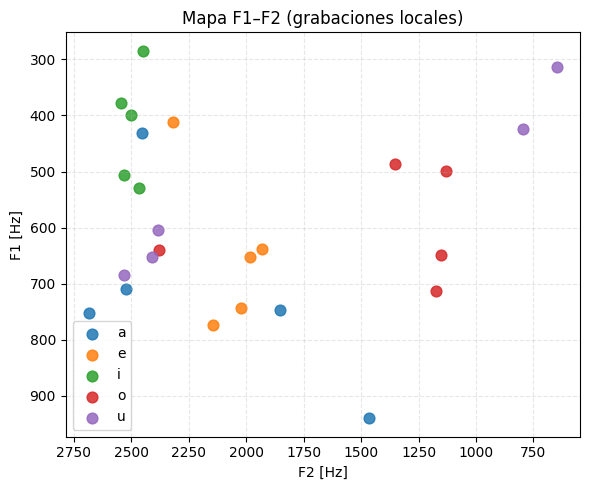

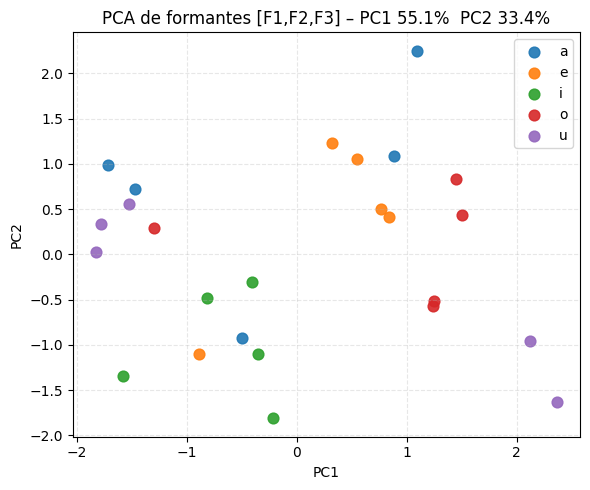

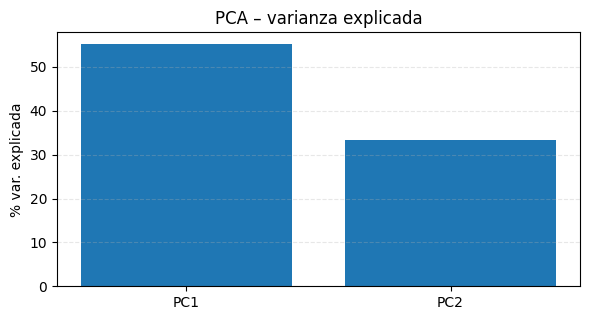

Varianza explicada: PC1=55.1%, PC2=33.4%


/Users/vpoblete/miniconda3/envs/acus220/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


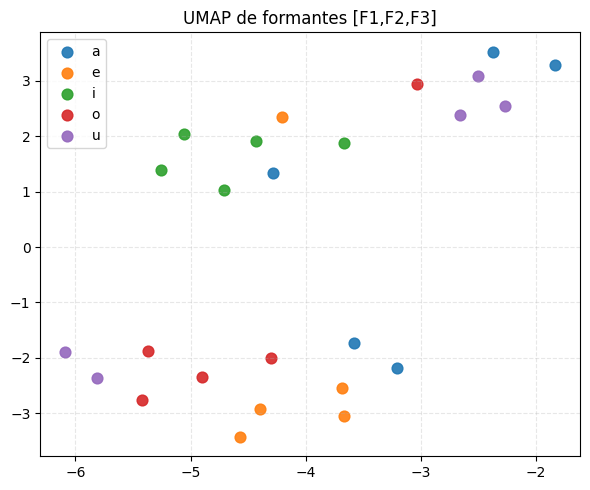

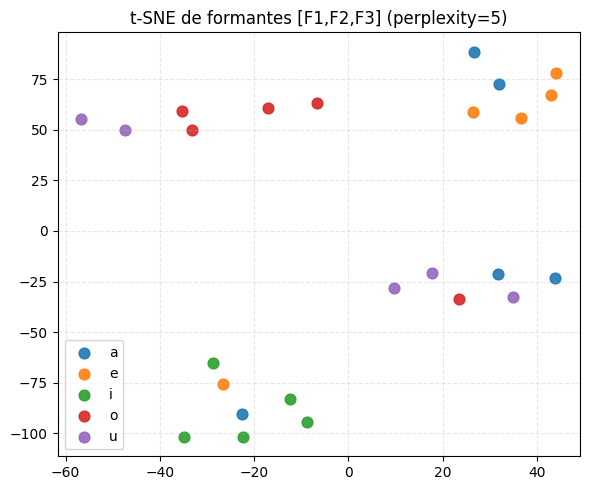

Figuras en: data/figs


In [4]:
# === Formantes locales + F1–F2 + PCA/UMAP/t-SNE ===
import os, glob, math, warnings
import numpy as np, pandas as pd, soundfile as sf, librosa, scipy.signal as sig
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

AUDIO_DIR = "data/mis_vocales"
CSV_OUT   = "data/formants_local.csv"
FIGS_DIR  = Path("data/figs"); FIGS_DIR.mkdir(parents=True, exist_ok=True)

def load_mono(path, target_sr=16000):
    x, sr = sf.read(path, always_2d=False)
    if x.ndim > 1:
        x = x.mean(axis=1)
    if sr != target_sr:
        x = librosa.resample(x.astype(float), orig_sr=sr, target_sr=target_sr); sr = target_sr
    x = x.astype(float)
    m = np.max(np.abs(x)) + 1e-12
    x /= m
    return x, sr

def preemph(x, k=0.97):
    return sig.lfilter([1., -k], [1.], x)

def pick_stable_chunk(x, sr, want_ms=80, frame_ms=25, hop_ms=10):
    N = len(x)
    if N < sr * (want_ms / 1000):
        return x
    L = int(sr * frame_ms / 1000); H = int(sr * hop_ms / 1000)
    L = max(L, 8); H = max(H, 1)
    pad = (((math.ceil((N - L) / H) + 1) * H + L) - N)
    xpad = np.pad(x, (0, max(0, pad)))
    frames = librosa.util.frame(xpad, frame_length=L, hop_length=H)
    energy = (frames**2).sum(axis=0)
    k = int(np.argmax(energy))
    center = k * H + L // 2
    half = int(sr * want_ms / 2000)
    i0 = max(0, center - half); i1 = min(len(x), center + half)
    if i1 - i0 < 8:
        half = min(half, len(x) // 2)
        i0 = max(0, center - half); i1 = min(len(x), center + half)
    return x[i0:i1]

def lpc_formants(x, sr, order=14, f_lo=90, f_hi=5000, bw_max=400):
    if len(x) < order*2 + 1:
        return []
    x = preemph(x, 0.97)
    xw = x * np.hanning(len(x))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        a = librosa.lpc(xw, order=order)
    rts = [r for r in np.roots(a) if np.imag(r) >= 0.01]
    freqs, bws = [], []
    for r in rts:
        ang = np.angle(r)
        freqs.append(ang * (sr / (2*np.pi)))
        bws.append(-0.5 * sr / np.pi * np.log(np.abs(r)))
    freqs = np.array(freqs); bws = np.array(bws)
    f_sel = np.sort(freqs[(freqs > f_lo) & (freqs < f_hi) & (bws < bw_max)])
    return f_sel.tolist()

# ---- Extrae formantes y guarda CSV ----
rows = []
wavs = sorted(glob.glob(str(Path(AUDIO_DIR) / "*.wav")))
assert wavs, f"No encontré WAVs en {AUDIO_DIR}"
for w in wavs:
    label = Path(w).stem.split("_")[0].lower().strip()
    x, sr = load_mono(w, 16000)
    x_seg = pick_stable_chunk(x, sr, want_ms=80)
    fs = lpc_formants(x_seg, sr, order=14)
    F1 = fs[0] if len(fs) > 0 else np.nan
    F2 = fs[1] if len(fs) > 1 else np.nan
    F3 = fs[2] if len(fs) > 2 else np.nan
    rows.append({"file": w, "vowel": label, "sr": sr, "F1": F1, "F2": F2, "F3": F3})

df = pd.DataFrame(rows)
df.to_csv(CSV_OUT, index=False)
print(f"Guardado CSV: {CSV_OUT} (n={len(df)})")

# ---- Mapa F1–F2 ----
plt.figure(figsize=(6,5))
for v in sorted(df["vowel"].dropna().unique()):
    sub = df[(df.vowel == v) & df.F1.notna() & df.F2.notna()]
    plt.scatter(sub["F2"], sub["F1"], s=60, label=v, alpha=0.85)
plt.gca().invert_xaxis(); plt.gca().invert_yaxis()
plt.xlabel("F2 [Hz]"); plt.ylabel("F1 [Hz]"); plt.title("Mapa F1–F2 (grabaciones locales)")
plt.legend(); plt.grid(ls="--", alpha=0.3); plt.tight_layout()
plt.savefig(FIGS_DIR / "F1F2_local.png", dpi=180); plt.show()

# ==== Prepara matriz de características (F1,F2,F3) ====
X = df[["F1","F2","F3"]].copy()
# imputación simple para NaN: medianas por columna
X = X.fillna(X.median())
X = X.values
y = df["vowel"].astype(str).values
Xz = StandardScaler().fit_transform(X)  # estandarizar es clave para PCA/TSNE/UMAP

# ==== PCA ====
try:
    pca = PCA(n_components=2, random_state=42)
    XY_pca = pca.fit_transform(Xz)

    # Scatter
    plt.figure(figsize=(6,5))
    for v in sorted(set(y)):
        m = (y == v)
        plt.scatter(XY_pca[m,0], XY_pca[m,1], s=60, label=v, alpha=0.9)
    evr = pca.explained_variance_ratio_
    plt.title(f"PCA de formantes [F1,F2,F3] – PC1 {evr[0]*100:.1f}%  PC2 {evr[1]*100:.1f}%")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(); plt.grid(ls="--", alpha=0.3); plt.tight_layout()
    plt.savefig(FIGS_DIR / "PCA_local.png", dpi=180); plt.show()

    # Varianza explicada (barplot)
    plt.figure(figsize=(6,3.3))
    plt.bar(["PC1","PC2"], evr*100)
    plt.ylabel("% var. explicada"); plt.title("PCA – varianza explicada")
    plt.grid(axis="y", ls="--", alpha=0.3); plt.tight_layout()
    plt.savefig(FIGS_DIR / "PCA_variance_local.png", dpi=180); plt.show()

    print(f"Varianza explicada: PC1={evr[0]*100:.1f}%, PC2={evr[1]*100:.1f}%")
except Exception as e:
    print("PCA no disponible:", e)

# ==== UMAP (si disponible) ====
try:
    import umap
    XY_umap = umap.UMAP(n_neighbors=10, min_dist=0.3, random_state=42).fit_transform(Xz)
    plt.figure(figsize=(6,5))
    for v in sorted(set(y)):
        m = (y == v)
        plt.scatter(XY_umap[m,0], XY_umap[m,1], s=60, label=v, alpha=0.9)
    plt.title("UMAP de formantes [F1,F2,F3]")
    plt.legend(); plt.grid(ls="--", alpha=0.3); plt.tight_layout()
    plt.savefig(FIGS_DIR / "UMAP_local.png", dpi=180); plt.show()
except Exception as e:
    print("UMAP no disponible (ok):", e)

# ==== t-SNE (rápido) ====
perp = max(5, min(20, len(df)//5))
XYt = TSNE(n_components=2, perplexity=perp, random_state=42,
           init="pca", n_iter=500, method="barnes_hut").fit_transform(Xz)
plt.figure(figsize=(6,5))
for v in sorted(set(y)):
    m = (y == v)
    plt.scatter(XYt[m,0], XYt[m,1], s=60, label=v, alpha=0.9)
plt.title(f"t-SNE de formantes [F1,F2,F3] (perplexity={perp})")
plt.legend(); plt.grid(ls="--", alpha=0.3); plt.tight_layout()
plt.savefig(FIGS_DIR / "TSNE_local.png", dpi=180); plt.show()

print("Figuras en:", FIGS_DIR)